## Figure 5 - Observation of ALOS-1/2 on Shinmoe-dake and Iwo-yama

1. Run the [post-processing notebook](./post_smallbaselineApp.ipynb) to prepare data
2. Run the following to plot the figure

In [228]:
%matplotlib inline
import os
import numpy as np
from datetime import timedelta, datetime as dt
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt, ticker, dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pprint import pprint
from mintpy.defaults.plot import *
from mintpy.utils import ptime, readfile, utils as ut, plot as pp
from mintpy.objects import timeseries
from mintpy import view, tsview, save_roipac

work_dir = os.path.expanduser('~/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS')
os.chdir(work_dir)
print('Go to directory:', work_dir)


## Dataset Initiation
proj_names = [
    'KirishimaAlosAT424/mintpy',
    'KirishimaAlosDT73/mintpy',
    'KirishimaAlos2AT131/mintpy',
    'KirishimaAlos2DT23/mintpy',
]

proj_dirs = []
ts_files  = []
vel_files = []
msk_files = []
dem_files = []
geom_files = []
unw_files = []
date12s = []
for proj_name in proj_names:
    proj_dir = os.path.expanduser('~/insarlab/Kirishima/{}'.format(proj_name))
    ts_file  = os.path.join(proj_dir, 'timeseries_ERA5_ramp_demErr.h5')
    vel_file = os.path.join(proj_dir, 'velocity.h5')
    msk_file = os.path.join(proj_dir, 'maskTempCoh.h5')
    dem_file = os.path.join(proj_dir, 'inputs/gsi10m.dem.wgs84')
    geom_file = os.path.join(proj_dir, 'inputs/geometryGeo.h5')

    # get displacement file name
    date12 = readfile.read_attribute(vel_file)['DATE12']
    if any(ds in proj_name for ds in ['AlosA', 'AlosD']):
        unw_file = os.path.join(proj_dir, '{}.unw'.format(date12))
    elif any(ds in proj_name for ds in ['Alos2A', 'Alos2D']):
        unw_file = os.path.join(proj_dir, '{}_msk.unw'.format(date12))

    ts_files.append(ts_file)
    vel_files.append(vel_file)
    msk_files.append(msk_file)
    dem_files.append(dem_file)
    geom_files.append(geom_file)
    unw_files.append(unw_file)
    date12s.append(date12)

## horz / vert files
model_dir = os.path.expanduser('~/insarlab/Kirishima/Model/data')
models = ['Kirishima2008post',
          'Kirishima2017pre']
hz_files = [os.path.join(model_dir, '{}Hz.h5'.format(model)) for model in models]
up_files = [os.path.join(model_dir, '{}Up.h5'.format(model)) for model in models]


## Figure Bounding Box
S, N, W, E = 31.893, 31.958, 130.843, 130.909

## Profile locations
line_iwo = [[31.947, W],
            [31.947, 130.860]]
line_shinmoe1 = [[31.915, 130.860],
                 [31.915, E]]
line_shinmoe2 = [[31.910, 130.860],
                 [31.910, E]]

## Points of Interest
lalo_list = [[31.9131, 130.8867],   #POI for AlosDT73 at Shinmoe
             [31.9096, 130.8869],   #POI for Alos2DT23 at Shinmoe
             [31.9465, 130.8531],   #POI for Alos2DT23 at Iwo
            ]

Go to directory: /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS


## Displacement time-series on Points of Interests

In [276]:
def read_point_displacement_timeseries(ts_file, pts_lalo):
    dates, dis_ts = ut.read_timeseries_lalo(pts_lalo[0], pts_lalo[1], ts_file, unit='cm', print_msg=False)
    ex_date_txt = os.path.join(os.path.dirname(ts_file), 'exclude_date.txt')
    ex_dates = ptime.date_list2vector(ptime.read_date_list(ex_date_txt))[0]
    idx_ex = [dates.tolist().index(di) for di in dates if di in ex_dates]
    idx_kp = [dates.tolist().index(di) for di in dates if di not in ex_dates]
    return dis_ts, dates, idx_kp, idx_ex

def plot_point_displacement_timeseries(ax, ts_file, pts_lalo, offset=0, marker='^'):
    dis_ts, dates, idx_kp, idx_ex = read_point_displacement_timeseries(ts_file, pts_lalo)
    ax.scatter(dates[idx_ex], dis_ts[idx_ex] + offset, marker=marker, edgecolor='k', facecolors='none', s=3**3, linewidths=0.5)
    ax.scatter(dates[idx_kp], dis_ts[idx_kp] + offset, marker=marker, edgecolor='k', facecolors='k', s=3**3, linewidths=0.5)
    pp.auto_adjust_xaxis_date(ax, dates, every_year=1, buffer_year=0.3)
    return ax

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS/dis_ts_shinmoe2008.png


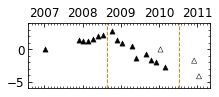

In [261]:
## (a) Plot Shinmoe-dake 2008 signal

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[2.8, 1])
plot_point_displacement_timeseries(ax, ts_files[1], lalo_list[0])

# plot event dates in dashed lines
event_dates = ptime.date_list2vector(['20080822', '20100710'])[0]
for e_date in event_dates:
    ax.axvline(x=e_date, c=pp.mplColors[1], linestyle='--', linewidth=1, zorder=0, clip_on=False)

# axes format
ax.set_facecolor('white')
ax.set_ylim([-6, 4])
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
#ax.set_ylabel('LOS displacement [cm]', fontsize=font_size, y=0.45)
fig.subplots_adjust(wspace=0.18, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('dis_ts_shinmoe2008.png')
plt.savefig(out_file, bbox_inches='tight', transparent=False, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS/dis_ts_kirishima2017.png


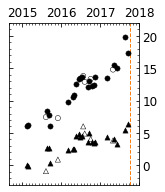

In [260]:
## (b) Plot Shinmoe-dake 2008 signal

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[2, 2.5])
plot_point_displacement_timeseries(ax, ts_files[3], lalo_list[2], offset=6, marker='o')
plot_point_displacement_timeseries(ax, ts_files[3], lalo_list[1])

# eruptive dates
e_date = ptime.date_list2vector(['20171011'])[0]
ax.axvline(x=e_date, c=pp.mplColors[1], linestyle='--', linewidth=1, zorder=0, clip_on=False)

# axes format
#ax.set_xlim(dt(2014, 10, 25), dt(2018, 1, 5))
ax.set_ylim([-3, 22])
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
#ax.set_ylabel('LOS displacement [cm]', fontsize=font_size, y=0.45)
fig.subplots_adjust(wspace=0.18, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('dis_ts_kirishima2017.png')
plt.savefig(out_file, bbox_inches='tight', transparent=False, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

### Map of displacement

displacement file: /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2008postUp.h5
displacement file: /Users/yunjunz/insarlab/Kirishima/Model/data/Kirishima2017preUp.h5
save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS/dis_map.png


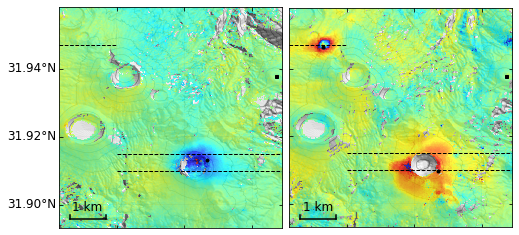

In [274]:
## (c-d) Plot velocity map

# view.py options
opt = ' --sub-lat {s} {n} --sub-lon {w} {e} '.format(s=S, n=N, w=W, e=E)
opt += ' --dem {}  --contour-step 100 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)
opt += ' -c jet --wrap --wrap-range -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.02 --nocbar --alpha 0.75 '
opt += ' --scalebar 0.2 0.13 0.04 --scalebar-pad 0.05 --noverbose '

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[7, 4])

fnames = up_files
lalo_locs = ['1 0 0 0', '0 0 0 0']
for ax, fname, lalo_loc in zip(axs, fnames, lalo_locs):
    print('displacement file: {}'.format(fname))
    cmd = 'view.py {f} {o} --lalo-loc {l} '.format(f=fname, o=opt, l=lalo_loc)
    data, atr, inps = view.prep_slice(cmd)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)

    # plot profile location
    for line in [line_iwo, line_shinmoe1, line_shinmoe2]:
        ax.plot([line[0][1], line[1][1]],
                [line[0][0], line[1][0]],
                c='k', linestyle='--', linewidth=1)

# point of interest
axs[0].plot(lalo_list[0][1], lalo_list[0][0], "k.", mew=1., ms=6)
axs[1].plot(lalo_list[1][1], lalo_list[1][0], "k.", mew=1., ms=6)
axs[1].plot(lalo_list[2][1], lalo_list[2][0], "k.", mew=1., ms=6)

## optimal model location
#ax.plot(inv_lon_2017pre, inv_lat_2017pre, 'k*', mfc=pp.mplColors[1], ms=10, linewidth=0.5, fillstyle='full')  #for the 2017 eruption
#ax.plot(inv_lon_2008post, inv_lat_2008post, 'k*', mfc=pp.mplColors[0], ms=10, linewidth=0.5, fillstyle='full')  #for the 2017 eruption
fig.subplots_adjust(wspace=0.03, left=0.05, right=0.95, top=0.95, bottom=0.05)

# output
out_file = os.path.abspath('dis_map.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS/cbar.png


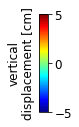

In [273]:
# colorbar
fig, cax = plt.subplots(nrows=1, ncols=1, figsize=[0.15, 1.8])
cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-5, 0, 5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('vertical\ndisplacement [cm]', fontsize=font_size)
cbar.ax.yaxis.set_label_position("left")

# output
out_file = os.path.abspath('cbar.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()

## Profile of displacement in vert / horz direction

save figure to /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS/profile.png


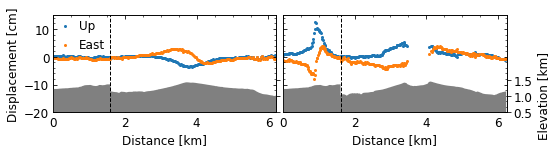

In [275]:
## (e-f) profile locations
atr = readfile.read_attribute(vel_files[0])
phase2range = float(atr['WAVELENGTH']) / (-4 * np.pi)

## plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[7, 1.5], sharey=True)
lines_list = [[line_iwo, line_shinmoe1],
              [line_iwo, line_shinmoe2]]
ax2s = []
for i in range(2):
    ax = axs[i]
    fnames = [up_files[i], hz_files[i]]
    labels = ['Up','East']

    # plot transection - ax
    for j in range(len(fnames)):
        data, atr = readfile.read(fnames[j])
        txn = ut.transect_lines(data*phase2range, atr, lines_list[i])
        ax.scatter(txn['distance']/1000., txn['value']*100., s=2**2, color=pp.mplColors[j], label=labels[j])

    # plot topography - ax2
    data, atr = readfile.read(dem_file)
    txn2 = ut.transect_lines(data, atr, lines_list[i])
    ax2 = ax.twinx()
    ax2.fill_between(txn2['distance']/1000., txn2['value']/1000., facecolor='gray', zorder=0)

    # plot profile break point - ax2
    ax2.axvline(x=txn['start_distance'][1:]/1000., c='k', linestyle='--', linewidth=1, zorder=10)

    # axis format - ax
    ax.set_xlim(0, txn['distance'][-1]/1000.)
    ax.set_ylim(-20, 15)
    ax.set_xlabel('Distance [km]', fontsize=font_size)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))
    ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)

    # axis format - ax2
    ax2.set_ylim(0.5, 3.5)
    ax2.set_yticks(np.arange(0.5, 1.6, 0.5))
    #ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax2.tick_params(which='both', direction='out', colors='k', labelsize=font_size, bottom=True, top=False, left=False, right=True)
    ax2s.append(ax2)

fig.subplots_adjust(wspace=0.03, left=0.05, right=0.95, top=0.95, bottom=0.05)
axs[0].set_ylabel('Displacement [cm]', fontsize=font_size)
axs[0].legend(loc='upper left', bbox_to_anchor=(-0.05, 1.07), fontsize=font_size, frameon=False, handletextpad=0.2, columnspacing=0.1)
ax2s[0].set_yticklabels([])
ax2s[1].set_ylabel('Elevation [km]', fontsize=font_size, y=0.18)

# output
out_file = os.path.abspath('profile.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to', out_file)
plt.show()

### Convert velocity to displacement

In [ ]:
# inversion result for the 2017pre
inv_file_2017pre = os.path.expanduser('~/insarlab/Kirishima/Model/Shinmoe2017pre/invert_1_T/KirishimaAlos2DT23_20150209_20170918.h5')
inv_atr_2017pre = readfile.read_attribute(inv_file_2017pre)
inv_lat_2017pre = float(inv_atr_2017pre['MCTG_LAT'])
inv_lon_2017pre = float(inv_atr_2017pre['MCTG_LON'])
# inversion result for the 2008post
inv_file_2008post = os.path.expanduser('~/insarlab/Kirishima/Model/Shinmoe2008post/invert_1_2_C/ShinmoeAlosDT73_20081012_20100302.h5')
inv_atr_2008post = readfile.read_attribute(inv_file_2008post)
inv_lat_2008post = float(inv_atr_2008post['CDMN_LAT'])
inv_lon_2008post = float(inv_atr_2008post['CDMN_LON'])

save figure to file /Users/yunjunz/Documents/Paper/2019_Kirishima/figs_src/obs_ALOS2/dis_map.png


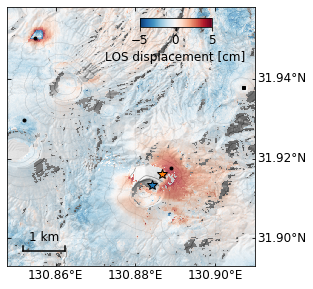

In [24]:
## Plot velocity map
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[4, 4])

opt = ' --sub-lat 31.893 31.958 --sub-lon 130.848 130.91 '
opt += '--dem {} --contour-step 100 --contour-smooth 0.0 '.format(dem_file)
opt += ' -c RdBu_r --wrap --wrap-range -5 5 -u cm '
opt += ' --notitle --fontsize 12 --ref-size 3 --lalo-step 0.02 --nocbar --alpha 0.7 '
opt += ' --lalo-loc 0 1 0 1'
opt += ' --scalebar 0.25 0.15 0.06 --scalebar-pad 0.05 '
opt += ' --noverbose --shade-az 315 '

# velocity map with DEM background
cmd = 'view.py {f} {o}'.format(f=unw_file, o=opt)
data, atr, inps = view.prep_slice(cmd)
ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)

# point of interest
ax.plot(lalo_list[0][1], lalo_list[0][0], "k.", mew=1., ms=6)
ax.plot(lalo_list[1][1], lalo_list[1][0], "k.", mew=1., ms=6)
ax.plot(lalo_list[2][1], lalo_list[2][0], "k.", mew=1., ms=6)

# optimal model location
ax.plot(inv_lon_2017pre, inv_lat_2017pre, 'k*', mfc=pp.mplColors[1], ms=10, linewidth=0.5, fillstyle='full')  #for the 2017 eruption
ax.plot(inv_lon_2008post, inv_lat_2008post, 'k*', mfc=pp.mplColors[0], ms=10, linewidth=0.5, fillstyle='full')  #for the 2017 eruption

fig.subplots_adjust(wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colorbar
#cax = fig.add_axes([0.1, 0.08, 0.03, 0.4])
cax = fig.add_axes([0.53, 0.88, 0.25, 0.03])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')#, ticks=[-2.5, 0, 2.5])
cbar.ax.tick_params(labelsize=font_size)
cbar.set_label('LOS displacement [cm]', fontsize=font_size)

# output
out_file = os.path.abspath('dis_map.png')
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file', out_file)
plt.show()